<a href="https://colab.research.google.com/github/jperdomos/Procesamiento-digital-de-se-ales/blob/main/ConvolucionChirp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento digital de señales - **Juan Camilo Perdomo Soto**


In [6]:
!pip install numpy matplotlib scipy ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


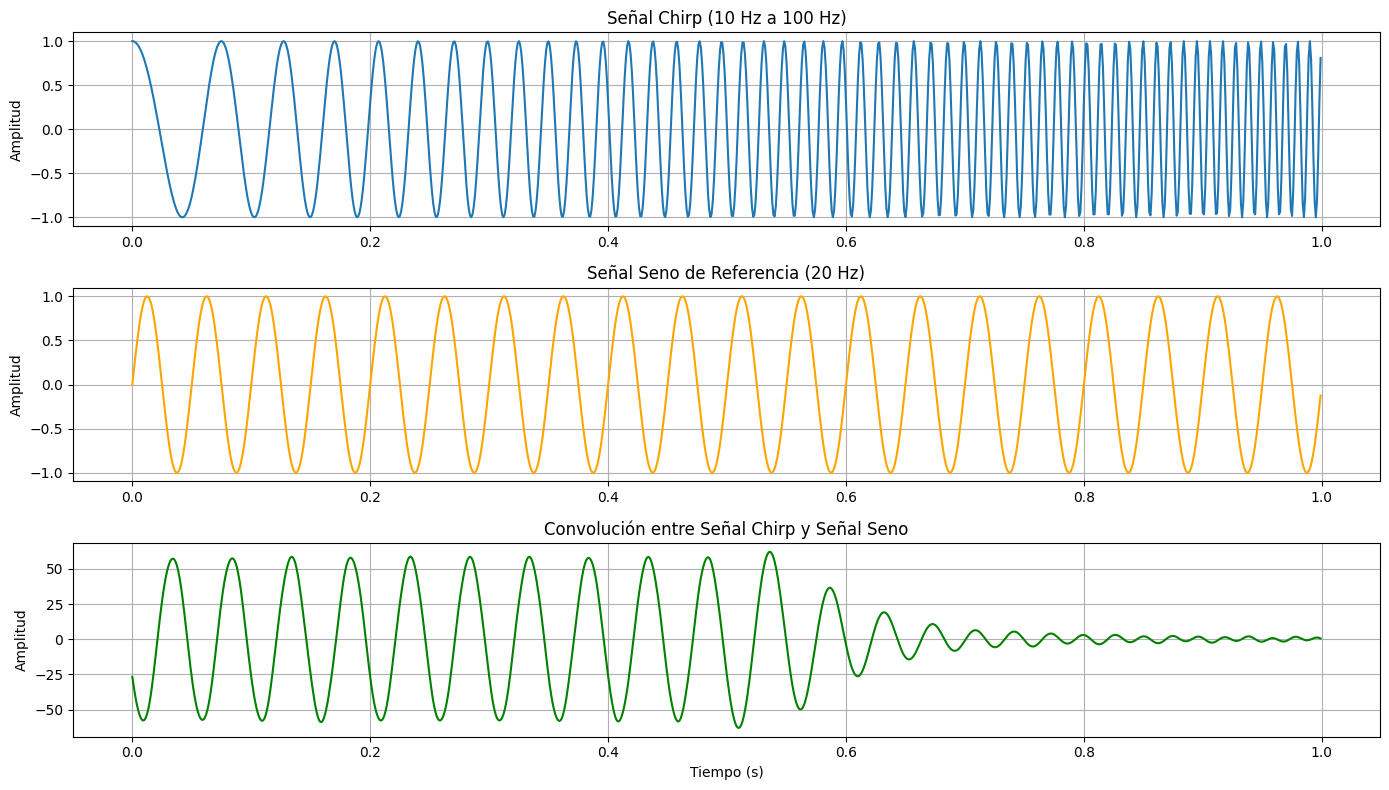

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, convolve
from scipy.fft import fft, fftfreq

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo

# Señal chirp de 10 a 100 Hz
chirp_signal = chirp(t, f0=10, f1=100, t1=1, method='linear')

# Señal seno de referencia a 20 Hz
ref_freq = 20  # Hz
ref_signal = np.sin(2 * np.pi * ref_freq * t)

conv_signal = convolve(chirp_signal, ref_signal, mode='same')


plt.figure(figsize=(14, 8))

# Señal chirp
plt.subplot(3, 1, 1)
plt.plot(t, chirp_signal)
plt.title("Señal Chirp (10 Hz a 100 Hz)")
plt.ylabel("Amplitud")
plt.grid(True)

# Señal de referencia
plt.subplot(3, 1, 2)
plt.plot(t, ref_signal, color='orange')
plt.title("Señal Seno de Referencia (20 Hz)")
plt.ylabel("Amplitud")
plt.grid(True)

# Resultado de la convolución
plt.subplot(3, 1, 3)
plt.plot(t, conv_signal, color='green')
plt.title("Convolución entre Señal Chirp y Señal Seno")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:

def compute_fft(signal, fs):
    N = len(signal)
    freq = fftfreq(N, 1/fs)
    spectrum = np.abs(fft(signal)) / N
    return freq[:N//2], spectrum[:N//2]  # Parte positiva

freq_chirp, spec_chirp = compute_fft(chirp_signal, fs)
freq_ref, spec_ref = compute_fft(ref_signal, fs)
freq_conv, spec_conv = compute_fft(conv_signal, fs)

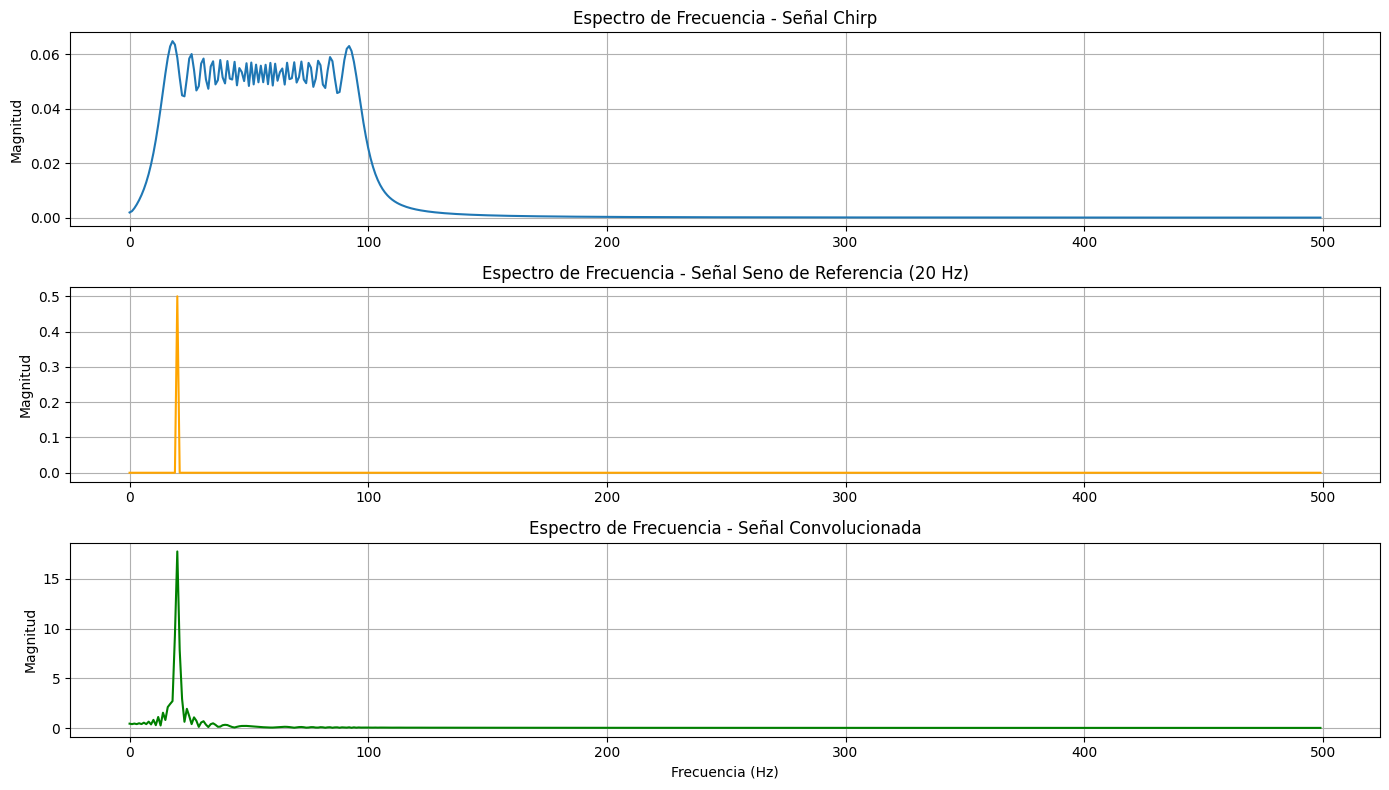

In [4]:
### ESPECTROS
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(freq_chirp, spec_chirp)
plt.title("Espectro de Frecuencia - Señal Chirp")
plt.ylabel("Magnitud")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freq_ref, spec_ref, color='orange')
plt.title("Espectro de Frecuencia - Señal Seno de Referencia (20 Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freq_conv, spec_conv, color='green')
plt.title("Espectro de Frecuencia - Señal Convolucionada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, convolve
from ipywidgets import interact, FloatSlider, VBox

# Parámetros de la señal
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
chirp_signal = chirp(t, f0=10, f1=100, t1=1, method='linear')

# Función interactiva
def actualizar_ventana(inicio, duracion, freq_ref):
    # Cálculo de índices
    i_inicio = int(inicio * fs)
    i_duracion = int(duracion * fs)
    i_fin = min(i_inicio + i_duracion, fs)

    ventana_chirp = chirp_signal[i_inicio:i_fin]
    ventana_t = t[i_inicio:i_fin]
    ventana_ref = np.sin(2 * np.pi * freq_ref * ventana_t)

    conv_local = convolve(ventana_chirp, ventana_ref, mode='same')

    # Graficar
    plt.figure(figsize=(12, 8))

    # Señal chirp completa
    plt.subplot(3, 1, 1)
    plt.plot(t, chirp_signal, label='Chirp')
    plt.axvspan(t[i_inicio], t[i_fin-1], color='gray', alpha=0.3, label='Ventana')
    plt.title("Señal Chirp con Ventana Deslizante")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()

    # Señales dentro de la ventana
    plt.subplot(3, 1, 2)
    plt.plot(ventana_t, ventana_chirp, label="Chirp (ventana)")
    plt.plot(ventana_t, ventana_ref, '--', label=f"Ref ({freq_ref} Hz)", color='orange')
    plt.title("Señales dentro de la Ventana")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()

    # Resultado de la convolución local
    plt.subplot(3, 1, 3)
    plt.plot(ventana_t, conv_local, color='green')
    plt.title("Convolución Local")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Interfaz interactiva
interact(
    actualizar_ventana,
    inicio=FloatSlider(min=0.0, max=0.8, step=0.01, value=0.3, description='Inicio (s)'),
    duracion=FloatSlider(min=0.05, max=0.5, step=0.01, value=0.2, description='Duración (s)'),
    freq_ref=FloatSlider(min=5, max=100, step=1, value=20, description='f Ref (Hz)')
)


interactive(children=(FloatSlider(value=0.3, description='Inicio (s)', max=0.8, step=0.01), FloatSlider(value=…

<function __main__.actualizar_ventana(inicio, duracion, freq_ref)>